In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import ndcg_score, dcg_score
import time

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#data= pd.read_csv('/content/gdrive/MyDrive/XGBoost/GT-shuffled_2407.csv') ## with top 100
data= pd.read_csv('/content/gdrive/MyDrive/Thesis/RSE_Module/shuffledDS.csv') ## without top 100


In [ ]:
data.head()

,Response Time,Availability,Throughput,Reliability,Latency,Rank
0,408.21,56,5.0,73,121.46,2281
1,328.60,86,1.7,73,9.20,1627
2,356.75,56,7.5,83,8.75,1479
3,246.53,88,6.8,53,63.45,1981
4,176.25,89,7.1,80,39.50,1226


In [ ]:
x = data.drop(['Rank'], axis=1)
y = data['Rank']

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state =1)

In [ ]:
start_time = time.time()
model = XGBRegressor(n_estimators=600, learning_rate=0.1, max_depth=5)

In [ ]:
#model.fit(x_train, y_train)
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_set=eval_set, eval_metric='mae', early_stopping_rounds=10)

[0]	validation_0-mae:548.62497	validation_1-mae:543.50026
[1]	validation_0-mae:498.28749	validation_1-mae:493.87751
[2]	validation_0-mae:452.69746	validation_1-mae:450.00722
[3]	validation_0-mae:411.93657	validation_1-mae:410.76516
[4]	validation_0-mae:374.50801	validation_1-mae:374.20810
[5]	validation_0-mae:340.76475	validation_1-mae:342.21591
[6]	validation_0-mae:310.82686	validation_1-mae:312.96543
[7]	validation_0-mae:283.32600	validation_1-mae:286.48982
[8]	validation_0-mae:258.65613	validation_1-mae:263.34561
[9]	validation_0-mae:235.98498	validation_1-mae:241.54502
[10]	validation_0-mae:215.68175	validation_1-mae:221.83413
[11]	validation_0-mae:197.06089	validation_1-mae:204.66356
[12]	validation_0-mae:180.62622	validation_1-mae:189.30329
[13]	validation_0-mae:165.32610	validation_1-mae:175.13266
[14]	validation_0-mae:151.47993	validation_1-mae:161.98162
[15]	validation_0-mae:139.48473	validation_1-mae:150.12512
[16]	validation_0-mae:128.45566	validation_1-mae:140.11296
[17]	va

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-mae:29.93269	validation_1-mae:48.68052
[44]	validation_0-mae:29.19206	validation_1-mae:47.97589
[45]	validation_0-mae:28.53229	validation_1-mae:47.43687
[46]	validation_0-mae:27.93033	validation_1-mae:46.81682
[47]	validation_0-mae:27.41471	validation_1-mae:46.34956
[48]	validation_0-mae:26.89882	validation_1-mae:45.94822
[49]	validation_0-mae:26.48041	validation_1-mae:45.51330
[50]	validation_0-mae:26.01218	validation_1-mae:45.03213
[51]	validation_0-mae:25.63762	validation_1-mae:44.66638
[52]	validation_0-mae:25.34336	validation_1-mae:44.40057
[53]	validation_0-mae:25.03173	validation_1-mae:44.11122
[54]	validation_0-mae:24.74740	validation_1-mae:43.74976
[55]	validation_0-mae:24.49150	validation_1-mae:43.43423
[56]	validation_0-mae:24.19673	validation_1-mae:43.16036
[57]	validation_0-mae:23.90901	validation_1-mae:42.92844
[58]	validation_0-mae:23.72567	validation_1-mae:42.80464
[59]	validation_0-mae:23.45196	validation_1-mae:42.55982
[60]	validation_0-mae:23.15605	

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

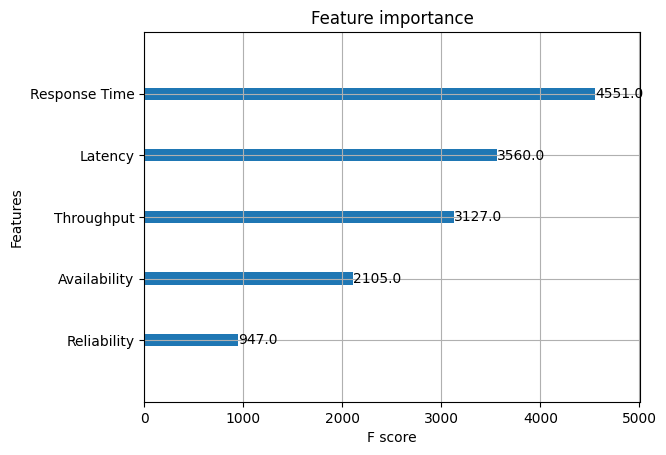

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
xgb.plot_importance(model, ax=plt.gca())

In [ ]:
results = model.evals_result()
train_error = results['validation_0']['mae']
test_error = results['validation_1']['mae']

In [ ]:
print(f"Training error: {train_error[-1]:.2f}")
print(f"Test error: {test_error[-1]:.2f}")
best_iteration = model.best_iteration
print("best_iteration:",best_iteration )

Training error: 4.74
Test error: 31.96
best_iteration: 518


In [ ]:
predictions = model.predict(x_test)

In [ ]:
pred_train = model.predict(x_train)

In [ ]:
pred_train

array([ 333.9792 ,  848.5083 , 1051.2307 , ..., 1015.24426, 1485.7893 ,
       1217.7998 ], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  ## use function score   RMSE

In [ ]:
print( r2_score(y_train, pred_train) ) # how much variance the model explains?

0.9999035972671778


In [ ]:
print( mean_squared_error(y_train, pred_train) )  ##  lower -> better ??

46.911829446478286


In [ ]:
mae_train = (mean_absolute_error(y_train, pred_train))
print(mae_train)

4.817617713315335


In [ ]:
model.score(x_test, y_test)  ## R^2

0.9954986050242786

In [ ]:
print(r2_score(y_test, predictions))

0.9954986050242786


In [ ]:
print(mean_squared_error(y_test, predictions))

2121.7362194180178


In [ ]:
mae_test =mean_absolute_error(y_test, predictions)
print(mae_test)

31.95693246074689


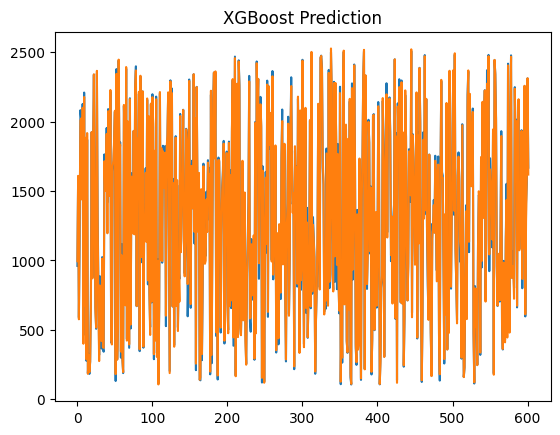

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax,y_test, label="original")
plt.plot(x_ax, predictions, label= "predicted")
plt.title("XGBoost Prediction")
plt.legend
plt.show()

In [ ]:
data2= pd.read_csv('/content/gdrive/MyDrive/Thesis/RSE_Module/shuffledTop100.csv')

In [ ]:
data2.head()

,Response Time,Availability,Throughput,Reliability,Latency,Rank
0,124.38,87,15.8,73,0.88,84
1,89.00,83,13.2,73,1.00,54
2,129.33,95,15.9,73,1.00,71
3,38.00,71,21.1,73,2.00,46
4,100.00,94,21.8,73,2.00,45


In [ ]:
#x2 = data2.drop(['Rank'],axis=1)
#y2 = data2['Rank']

x2 = data2.drop(['Rank'], axis=1)
y2 = data2['Rank']

In [ ]:
x_test_top100 = x2
y_test_top100 = y2

In [ ]:
print(y_test_top100)

0     84
1     54
2     71
3     46
4     45
      ..
95    61
96    72
97    15
98    93
99    52
Name: Rank, Length: 100, dtype: int64


In [ ]:
predictions = model.predict(x_test_top100)
end_time = time.time()

In [ ]:
model.score(x_test_top100, y_test_top100)

0.46204014877726374

In [ ]:
print(r2_score(y_test_top100, predictions))

0.46204014877726374


In [ ]:
print(mean_squared_error(y_test_top100, predictions))

448.255046031345


In [ ]:
mae_test_top100 = mean_absolute_error(y_test_top100, predictions)
print(mae_test_top100)

17.122398884296416


In [ ]:
print(predictions)

[ 98.13104    76.679      64.212135   91.61055    52.969193   58.44232
  43.911545   73.546684    4.1651216 -46.551994   28.586203   47.366592
 104.29302    49.36727   109.77262   -27.597654   75.286575   97.75711
  26.246443   39.777187   71.233665   85.37352    34.06594    68.99935
  73.67492    23.321136   85.41316   101.53987    22.364079   80.50124
  12.7162695  58.863495   94.925865   41.127922  103.17334   -17.40568
  92.87227    74.160774   46.949776   41.562344   76.355354   61.491478
  -1.3018279 114.186165   42.92601    21.234806  120.19498    49.4734
 100.477776   27.245533   49.653267    3.2145612  38.448826   66.73413
   4.958661   98.28195    19.827969   52.89722    44.23844    81.72459
 107.87905   109.18371    55.73255    61.120647   64.65338   104.16825
  52.310062   90.2405     73.767975  115.18004    76.76738    25.486408
  74.76933    46.251328  115.75226    87.49009    73.289696   49.9386
 106.438675   82.14517    77.93759   140.04597    60.17994    40.24163
 -36.

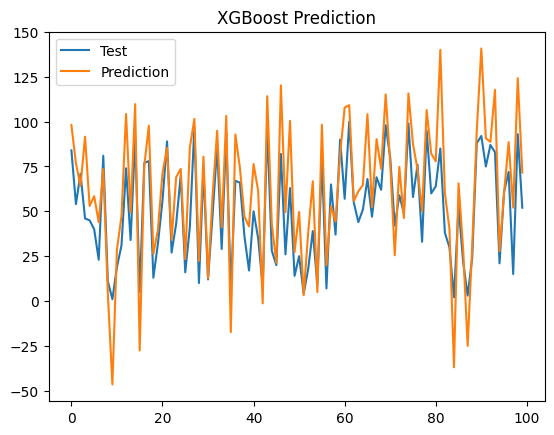

In [ ]:
x_ax_top100 = range(len(y_test_top100))
plt.plot(x_ax_top100,y_test_top100, label="original")
plt.plot(x_ax_top100, predictions, label= "predicted")
plt.title("XGBoost Prediction")
plt.legend(['Test', 'Prediction'], loc='best')
plt.legend
plt.show()

In [ ]:
elapsed_time = end_time - start_time

elapsed_time

3.0753090381622314